In [62]:
# importa os pacotes necessários para calcular os diagramas e plotar imagens
import numpy as np 

import persim as pm 
import ripser 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from itertools import product

np.random.seed(1907311005)

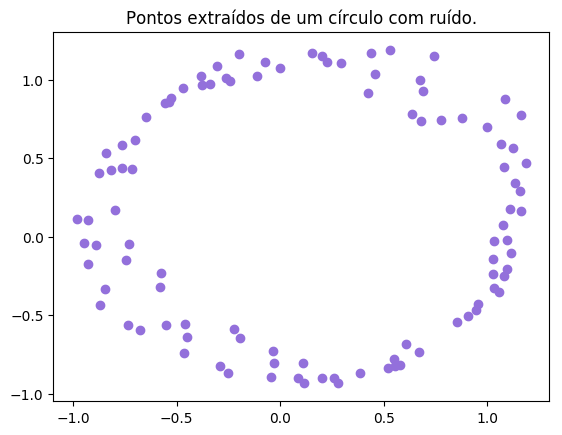

In [44]:
# gera o círculo, plota e salva na pasta das imagens diretamente
# número de pontos
n = 100
# ângulos dos pontos
angulos = np.linspace(0, 2*np.pi, n)
# ruído para o círculo
ruido = np.random.rand(n)
# influência do ruído
ϵ = 0.3
# gera os pontos
x = np.cos(angulos) + ϵ * ruido
y = np.sin(angulos) + ϵ * ruido
# plot o circulo 
plt.scatter(x,y,c='mediumpurple')
plt.title('Pontos extraídos de um círculo com ruído.');
plt.savefig('../images/noisy_circle.png', dpi=300)

Vamos agora calcular os diagramas de persistência do círculo. Para isso utilizamos o pacote *ripser* do *scikit-tda*.

In [45]:
# nossos dados gerados anteriormente
dados = np.zeros((n,2)); dados[:,0] = x; dados[:,1] = y

# calcula os diagramas de persistência de dimensão 0 e 1
diagramas = ripser.ripser(dados)['dgms']

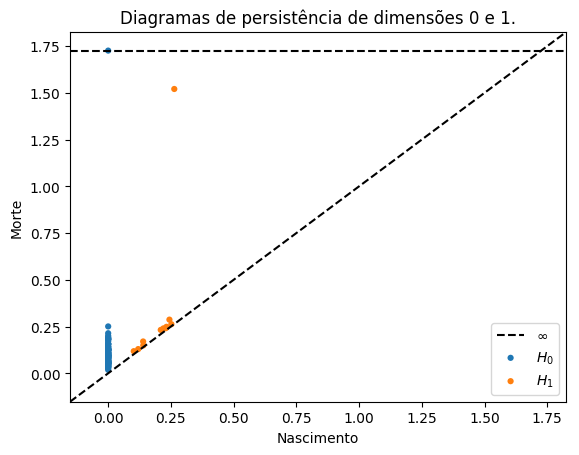

In [46]:
# agora vamos plotar e salvar os diagramas
ripser.plot_dgms(diagramas, xy_labels = ['Nascimento', 'Morte'])
plt.title('Diagramas de persistência de dimensões 0 e 1.');
plt.savefig('../images/persdcircle.png', dpi=300)

Podemos agora analisar os diagramas de persistência. Para cada diagrama vamos definir 
três varianças e 3 tamanhos de grid (em pixeis) diferentes.

In [55]:
variancias = [0.001, 0.1, 1.0]
pixel = [10, 50]
pd_um = diagramas[1]

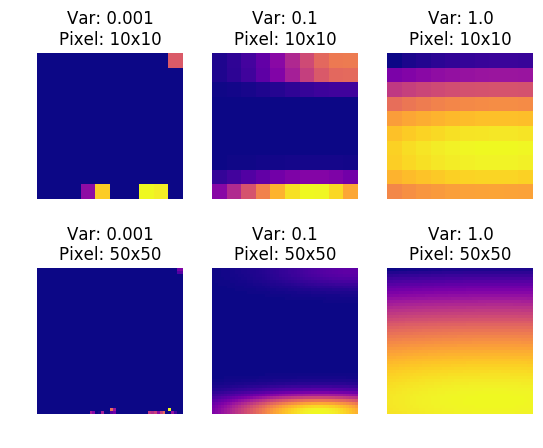

In [80]:
tamanho_figura = (len(pixel), len(variancias))
fig, axes = plt.subplots(tamanho_figura[0], tamanho_figura[1])

for counter, (p, var) in enumerate(product(pixel, variancias)):
    ax = axes[np.unravel_index(counter, tamanho_figura)]
    pim = pm.PersImage(pixels=(p,p), spread=var, verbose=False)
    img = pim.transform(pd_um)
    ax.set_title('Var: ' + str(var) + '\nPixel: %ix%i' %(p,p))
    pim.show(img,ax)

fig.subplots_adjust(hspace=0.4)
plt.savefig('../images/comparacao_pis.png')#, bbox_inches='tight')
plt.show()